In [ ]:
# Test 2-1 Dataset 2 v2
# This test uses the new dataset 16000 images
# This test uses a simple CNN to classify between having an Square or not

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

2024-04-15 20:42:07.507151: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 20:42:07.507202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 20:42:07.539916: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 20:42:07.608121: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 20:42:08.656139: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_2/train'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_2/test'

In [3]:
IMG_SIZE = 500
BATCH_SIZE = 32
RANDOM_SEED = random.randint(0, 1000)
print(RANDOM_SEED)

921


In [4]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    seed=RANDOM_SEED,
    shuffle=False
    )

Found 11000 files belonging to 2 classes.


2024-04-15 20:42:16.289687: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 20:42:16.289871: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-15 20:42:16.289984: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 5000 files belonging to 2 classes.


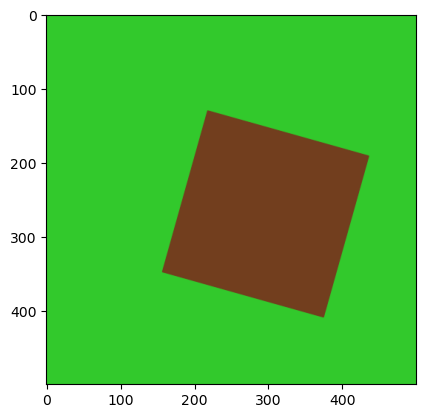

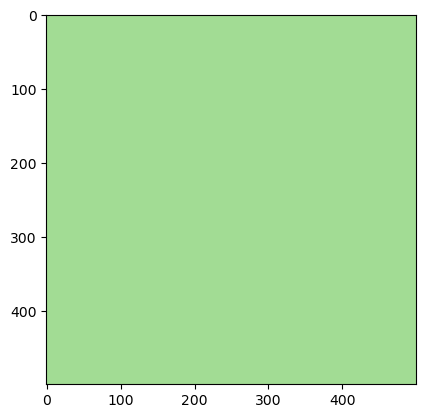

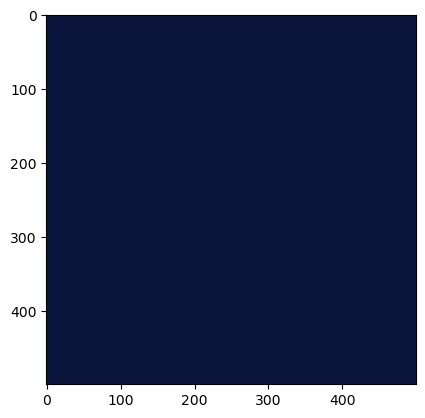

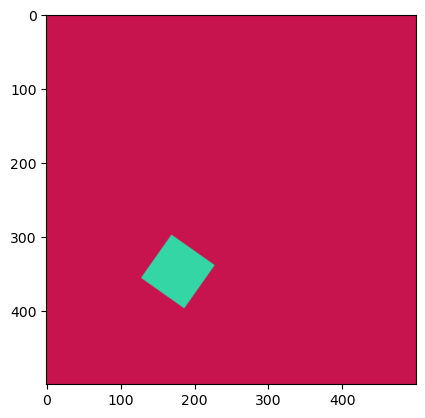

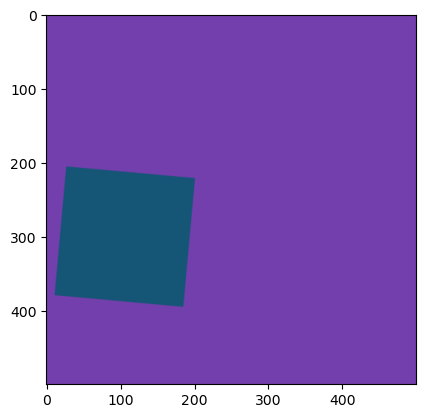

In [5]:
for data_batch, _ in train_dataset.take(1):
    for i in range(5):
        plt.imshow(data_batch[i].numpy().astype("uint8"))
        plt.show()

In [6]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [8]:
checkpoint_filepath = 'models/2-1/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)


In [10]:
#Best Epoch = loss: 0.0345 - acc: 0.9900 - val_loss: 0.0366 - val_acc: 0.9970

history = model.fit(train_dataset, epochs=15, batch_size=32, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/15
344/344 [==============================] - ETA: 0s - loss: 0.6406 - acc: 0.6232
Epoch 1: val_loss improved from inf to 0.47206, saving model to models/2-1/ch-001.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-001.ckpt/assets


344/344 [==============================] - 96s 279ms/step - loss: 0.6406 - acc: 0.6232 - val_loss: 0.4721 - val_acc: 0.8262
Epoch 2/15
344/344 [==============================] - ETA: 0s - loss: 0.3202 - acc: 0.8851
Epoch 2: val_loss improved from 0.47206 to 0.22017, saving model to models/2-1/ch-002.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-002.ckpt/assets


344/344 [==============================] - 87s 253ms/step - loss: 0.3202 - acc: 0.8851 - val_loss: 0.2202 - val_acc: 0.9410
Epoch 3/15
344/344 [==============================] - ETA: 0s - loss: 0.1252 - acc: 0.9601
Epoch 3: val_loss improved from 0.22017 to 0.09100, saving model to models/2-1/ch-003.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-003.ckpt/assets


344/344 [==============================] - 90s 260ms/step - loss: 0.1252 - acc: 0.9601 - val_loss: 0.0910 - val_acc: 0.9682
Epoch 4/15
344/344 [==============================] - ETA: 0s - loss: 0.0790 - acc: 0.9775
Epoch 4: val_loss improved from 0.09100 to 0.04154, saving model to models/2-1/ch-004.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-004.ckpt/assets


344/344 [==============================] - 93s 270ms/step - loss: 0.0790 - acc: 0.9775 - val_loss: 0.0415 - val_acc: 0.9870
Epoch 5/15
344/344 [==============================] - ETA: 0s - loss: 0.0876 - acc: 0.9806
Epoch 5: val_loss improved from 0.04154 to 0.03636, saving model to models/2-1/ch-005.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-005.ckpt/assets


344/344 [==============================] - 94s 272ms/step - loss: 0.0876 - acc: 0.9806 - val_loss: 0.0364 - val_acc: 0.9872
Epoch 6/15
344/344 [==============================] - ETA: 0s - loss: 0.0638 - acc: 0.9825
Epoch 6: val_loss did not improve from 0.03636
344/344 [==============================] - 93s 270ms/step - loss: 0.0638 - acc: 0.9825 - val_loss: 0.0561 - val_acc: 0.9836
Epoch 7/15
344/344 [==============================] - ETA: 0s - loss: 0.0848 - acc: 0.9866
Epoch 7: val_loss improved from 0.03636 to 0.01866, saving model to models/2-1/ch-007.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-007.ckpt/assets


344/344 [==============================] - 95s 276ms/step - loss: 0.0848 - acc: 0.9866 - val_loss: 0.0187 - val_acc: 0.9938
Epoch 8/15
344/344 [==============================] - ETA: 0s - loss: 0.0430 - acc: 0.9903
Epoch 8: val_loss did not improve from 0.01866
344/344 [==============================] - 94s 272ms/step - loss: 0.0430 - acc: 0.9903 - val_loss: 0.0355 - val_acc: 0.9930
Epoch 9/15
344/344 [==============================] - ETA: 0s - loss: 0.0509 - acc: 0.9892
Epoch 9: val_loss did not improve from 0.01866
344/344 [==============================] - 92s 267ms/step - loss: 0.0509 - acc: 0.9892 - val_loss: 0.0621 - val_acc: 0.9908
Epoch 10/15
344/344 [==============================] - ETA: 0s - loss: 0.0467 - acc: 0.9916
Epoch 10: val_loss did not improve from 0.01866
344/344 [==============================] - 90s 261ms/step - loss: 0.0467 - acc: 0.9916 - val_loss: 0.0420 - val_acc: 0.9914
Epoch 11/15
344/344 [==============================] - ETA: 0s - loss: 0.0427 - acc: 0.9

INFO:tensorflow:Assets written to: models/2-1/ch-013.ckpt/assets


344/344 [==============================] - 94s 273ms/step - loss: 0.1027 - acc: 0.9910 - val_loss: 0.0124 - val_acc: 0.9976
Epoch 14/15
344/344 [==============================] - ETA: 0s - loss: 0.0505 - acc: 0.9933
Epoch 14: val_loss did not improve from 0.01239
344/344 [==============================] - 94s 273ms/step - loss: 0.0505 - acc: 0.9933 - val_loss: 0.0243 - val_acc: 0.9962
Epoch 15/15
344/344 [==============================] - ETA: 0s - loss: 0.0630 - acc: 0.9929
Epoch 15: val_loss improved from 0.01239 to 0.00448, saving model to models/2-1/ch-015.ckpt
INFO:tensorflow:Assets written to: models/2-1/ch-015.ckpt/assets


INFO:tensorflow:Assets written to: models/2-1/ch-015.ckpt/assets


344/344 [==============================] - 96s 277ms/step - loss: 0.0630 - acc: 0.9929 - val_loss: 0.0045 - val_acc: 0.9986


In [11]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

157/157 [==============================] - 18s 110ms/step - loss: 0.0045 - acc: 0.9986
0.004476314410567284 0.9986000061035156


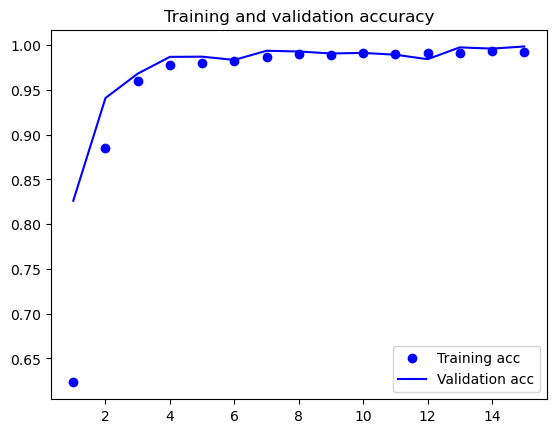

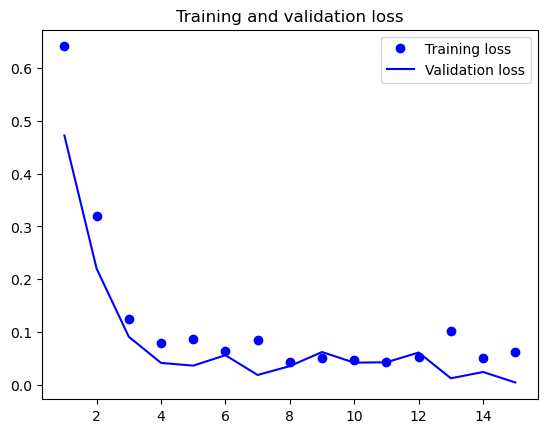

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/train_test_loss",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/train_test_acc",dpi=100)
plt.show()


In [26]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/square/square_309.png', target_size=(IMG_SIZE, IMG_SIZE))

In [29]:
img = tf.keras.preprocessing.image.load_img('../../Generator/Dataset_B/test/none/none_1.png', target_size=(IMG_SIZE, IMG_SIZE))

In [30]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
print(img_array.shape)
result = model.predict(img_array)
print("Result: ", result.round())

(1, 500, 500, 3)
1/1 [==============================] - 0s 27ms/step
Result:  [[0.]]


In [14]:
import csv
with open('results/2-1/results.csv', mode='w') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['Index', 'Label', 'Prediction'])
    for i, (data_batch, labels_batch) in enumerate(test_dataset):
        predictions = model.predict(data_batch)
        for j in range(len(predictions)):
            writer.writerow([i * BATCH_SIZE + j, labels_batch[j].numpy(), int(predictions[j][0].round())])

1/1 [==============================] - 0s 96ms/step


2024-04-15 22:45:40.840290: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 92ms/step


2024-04-15 22:45:43.330070: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 91ms/step


2024-04-15 22:45:48.981150: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 96000000 bytes after encountering the first element of size 96000000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


1/1 [==============================] - 0s 89ms/step


In [16]:
with open('results/2-1/results.csv', mode='r') as file:
    csvFile = csv.reader(file)
    for lines in csvFile:
        if lines[1] != lines[2]:
            print(lines)

['Index', 'Label', 'Prediction']
['37', '1', '0']
['38', '1', '0']
['125', '1', '0']
['1074', '1', '0']
['2075', '1', '0']
['2679', '1', '0']
['3563', '1', '0']
